#  Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Data set

dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
dataset_train

In [3]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train = np.array(X_train) 
y_train = np.array(y_train)


### Reshaping

In [10]:
X_train = np.reshape( X_train, ( X_train.shape[0], X_train.shape[1], 1 ) )

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initializing the RNN

In [12]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [18]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [19]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [20]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [25]:
%%time
regressor.fit( X_train, y_train, epochs = 100, batch_size = 32 )

Epoch 1/100
38/38 [==============================] - 16s 103ms/step - loss: 0.0311
Epoch 2/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0054
Epoch 9/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0052
Epoch 10/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0057
Epoch 11/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0052
Epoch 12/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0042
Epoch 13/100
38/38 [==

In [26]:
regressor.save("Saved Model RNN/RNN_1")

INFO:tensorflow:Assets written to: Saved Model RNN/RNN_1\assets


INFO:tensorflow:Assets written to: Saved Model RNN/RNN_1\assets


In [21]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [29]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')


In [34]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [32]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [33]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting predicted stock price of 2017

In [35]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) # We also need past data for next day pred

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values # for new 20 test points last 60 points of train 
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [38]:
predicted_stock_price_ = regressor.predict(X_test)

1/1 [==============================] - 0s 47ms/step


In [39]:
predicted_stock_price_

array([[0.97049654],
       [0.96498686],
       [0.96763533],
       [0.97084755],
       [0.97755784],
       [0.9892359 ],
       [0.99773735],
       [0.9986453 ],
       [0.9980037 ],
       [0.99819666],
       [0.99907476],
       [0.9995991 ],
       [0.9998667 ],
       [1.0015655 ],
       [1.0036161 ],
       [1.014655  ],
       [1.028658  ],
       [1.041697  ],
       [1.0456975 ],
       [1.0320957 ]], dtype=float32)

### Undo scaling

In [46]:
stock_price_predicted = sc.inverse_transform(predicted_stock_price_)

In [47]:
stock_price_predicted    # This is required format

array([[800.82007],
       [797.85834],
       [799.28204],
       [801.0088 ],
       [804.616  ],
       [810.8936 ],
       [815.4637 ],
       [815.9517 ],
       [815.6069 ],
       [815.71063],
       [816.1826 ],
       [816.4645 ],
       [816.60834],
       [817.5215 ],
       [818.62384],
       [824.5579 ],
       [832.0854 ],
       [839.0946 ],
       [841.2451 ],
       [833.93335]], dtype=float32)

### Visualizing results

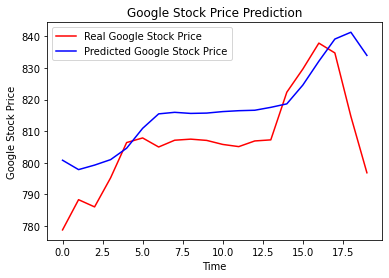

In [49]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(stock_price_predicted, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()